# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [14]:
import pandas as pd 

df_bryant = pd.read_csv(r".\data\Bryant et al 2010.csv", index_col=False)

df_bryant.head()

experiments = df_bryant.iloc[:, 2:11]
outcome = df_bryant.iloc[:, 15].values




experiments.head()






,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price
0,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997
1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003
2,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003
3,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003
4,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000


# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9
                 reproduce coverage  reproduce density
behaviors                     100.0              100.0
convergence                    90.0               90.0
population                     90.0               90.0
inequalities                   80.0               80.0
technologies                   30.0               20.0
fossils                        10.0               10.0
capital markets                10.0               10.0
coverage     0.340909
density        0.9375
id         

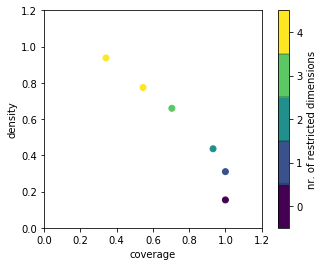

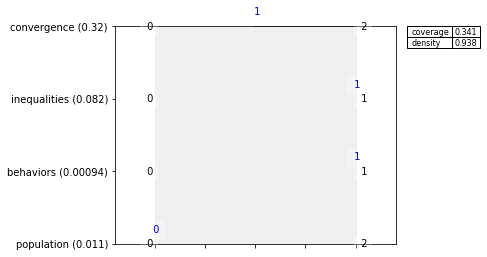

In [15]:

import pandas as pd
import matplotlib.pyplot as plt

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)



df_rozen = pd.read_csv(r".\data\Rozenberg et al 2014.csv",delimiter=',')



experiments = df_rozen.iloc[:, 0:7]
outcome_1 = df_rozen.iloc[:,7].values
outcome_2 = df_rozen.iloc[:,8].values
outcome_3 = df_rozen.iloc[:,9].values
outcome_4 = df_rozen.iloc[:,10].values
outcome_5 = df_rozen.iloc[:,11].values



prim_alg_1 = prim.Prim(experiments, outcome_1, threshold=0.4, peel_alpha=0.1)
box1 = prim_alg_1.find_box()

box1.show_tradeoff()
print(box1.resample(5))
box1.inspect(5)
box1.inspect(5, style='graph')

plt.show()








[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9
                 reproduce coverage  reproduce density
convergence                    90.0               90.0
behaviors                      90.0               90.0
population                     70.0               80.0
inequalities                   60.0               70.0
technologies                   20.0               20.0
capital markets                20.0               20.0
fossils                         0.0                0.0
coverage     0.321429
density        0.5625
id        

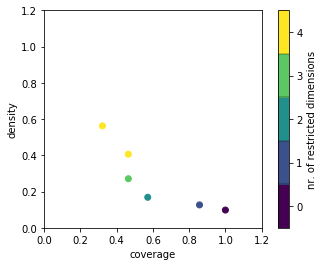

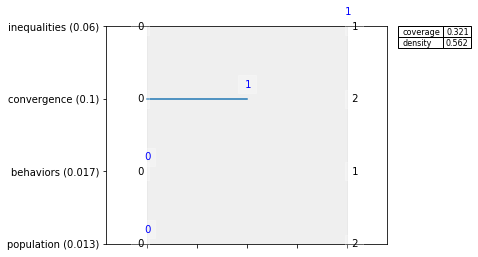

In [16]:

prim_alg_2 = prim.Prim(experiments, outcome_2, threshold=0.4, peel_alpha=0.1)
box2 = prim_alg_2.find_box()

box2.show_tradeoff()
print(box2.resample(5))
box2.inspect(5)
box2.inspect(5, style='graph')

plt.show()

[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9
                 reproduce coverage  reproduce density
inequalities                  100.0              100.0
population                    100.0              100.0
behaviors                     100.0              100.0
technologies                   60.0               60.0
convergence                    20.0               10.0
fossils                         0.0                0.0
capital markets                 0.0                0.0
coverage         0.55
density      0.916667
id

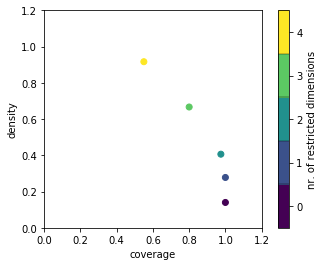

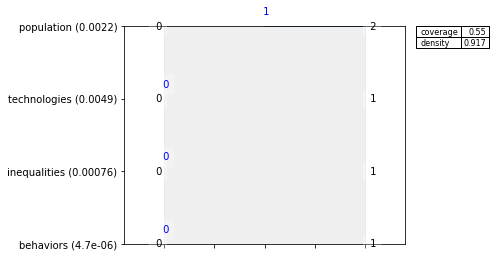

In [17]:
prim_alg_3 = prim.Prim(experiments, outcome_3, threshold=0.2, peel_alpha=0.1)
box3 = prim_alg_3.find_box()

box3.show_tradeoff()
print(box3.resample(4))
box3.inspect(4)
box3.inspect(4, style='graph')

plt.show()

[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9
                 reproduce coverage  reproduce density
inequalities                   70.0              100.0
behaviors                      70.0               80.0
convergence                    10.0               30.0
population                      0.0                0.0
technologies                    0.0                0.0
fossils                         0.0                0.0
capital markets                 0.0                0.0
coverage    0.913043
density     0.295775
id                 

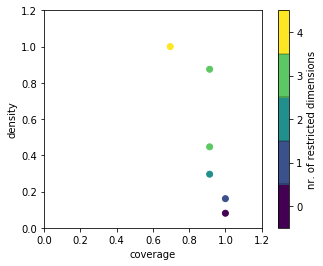

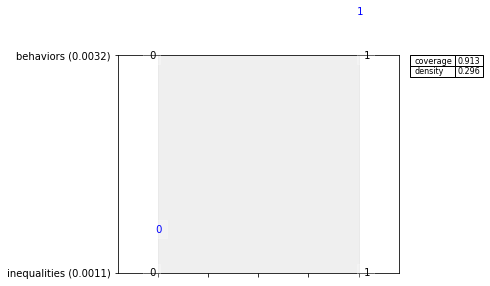

In [18]:

from ema_workbench.analysis import prim
prim_alg_4 = prim.Prim(experiments, outcome_4, threshold=0.3, peel_alpha=0.1)
box4 = prim_alg_4.find_box()

box4.show_tradeoff()
print(box4.resample(2))
box4.inspect(2)
box4.inspect(2, style='graph')

plt.show()

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [26]:
from ema_workbench import load_results
results = load_results(r'.\data\Hamarat et al 2013.gz')
print(results)

(     SWITCH Market price determination SWITCH TGC obligation curve  \
0                                    1                           2   
1                                    2                           3   
2                                    1                           3   
3                                    2                           2   
4                                    1                           2   
...                                ...                         ...   
4995                                 1                           1   
4996                                 1                           2   
4997                                 1                           1   
4998                                 1                           3   
4999                                 1                           1   

     SWITCH carbon cap SWITCH carbon price determination  \
0                    3                                 2   
1                    2                

In [11]:
from ema_workbench.analysis import prim



C:\Users\pratheepkumaar\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
